# Aim
The aim is to test pytesseract on all image formats

Original, Gray, Binary, Inverted Binary

Since some binary images have white text, and some have black. So we ned to formalize it to single format.

The aim is to convert ALL binary images into Black text on White backgrounds,a dn then test pytesseract on them 

In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import glob


from tensorflow.keras.models import model_from_json
from sklearn.preprocessing import LabelEncoder

import math
from termcolor import colored

from OCR_codes import get_countours, predict_from_model, get_image_formats

tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"


In [2]:
# Load model architecture, weight and labels
json_file = open('MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("[INFO] Labels loaded successfully...")



[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [3]:
def image_contour_OCR(plate_image, binary):
    #plate_image, gray, blur, binary, dilate = get_image_formats(img)
    #plate_image = all_image_formats[0]
    #binary = all_image_formats[1]
    #dilate = all_image_formats[2]
    
    #plt.imshow(binary,cmap="gray")
    crop_characters, test_roi = get_countours(plate_image, binary)
        
    final_string = ''
    for i,character in enumerate(crop_characters):
        #fig.add_subplot(grid[i])
        title = np.array2string(predict_from_model(character,model,labels))
        #plt.title('{}'.format(title.strip("'[]"),fontsize=20))
        final_string+=title.strip("'[]")
        #plt.axis(False)
        #plt.imshow(character,cmap='gray')
    
    return final_string, test_roi

In [4]:
img_folder_path = ('../plate_samples_256_64/*.jpg')
#img_folder_path = ('../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_4/det_LpImg_crops/*.jpg')

fnames = glob.glob(img_folder_path)
fnames.sort()
#print(fnames)

In [13]:
image_types = ['original','gray','binary','binary_inverted','binary_black_on_white','binary_white_on_black']

def test_all_formats(test_image):

    plt.figure(figsize=(30,10))
    
    all_image_formats = get_image_formats(test_image.astype(np.uint8)/255)
    
    plt.subplot(1,len(image_types), 1)
    plt.imshow(test_image)
        #print(colored(f'Original img pred string : {test_image_string}','red'))
    plt.title('original' , fontsize = 20)
        
    for type_cnt, img_type in enumerate(image_types[2:]):
        inimg =  all_image_formats[2+type_cnt]  
        final_string, test_roi = image_contour_OCR(all_image_formats[0], inimg)
        #final_string = resized_image_string = pytesseract.image_to_string(inimg, config=tess_config, lang="eng")        
        
        plt.subplot(1,len(image_types), type_cnt+2)
        plt.imshow(inimg, cmap = "gray")
        #print(colored(f'Original img pred string : {test_image_string}','red'))
        plt.title(img_type + ' : ' + final_string, fontsize = 20)
    
    plt.show() 
    

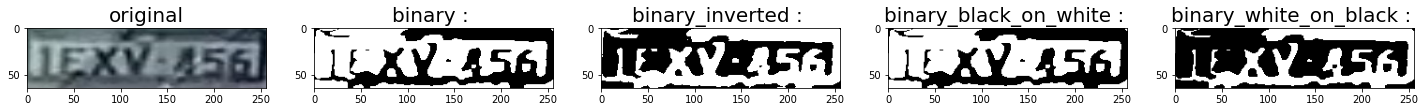

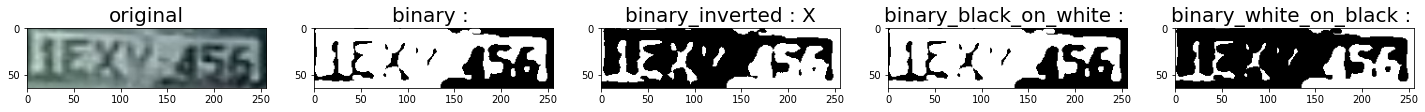

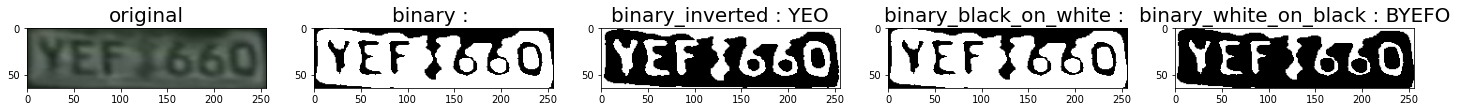

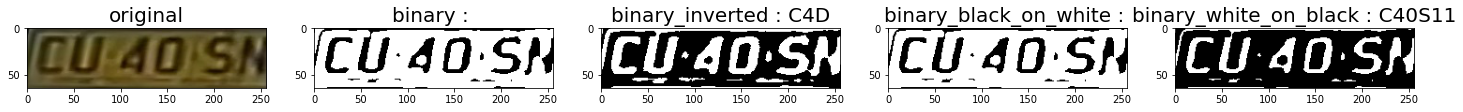

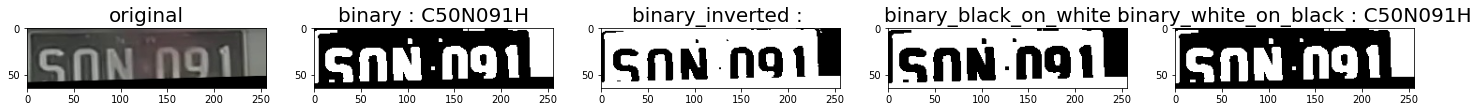

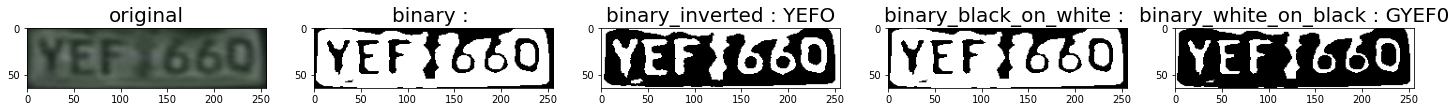

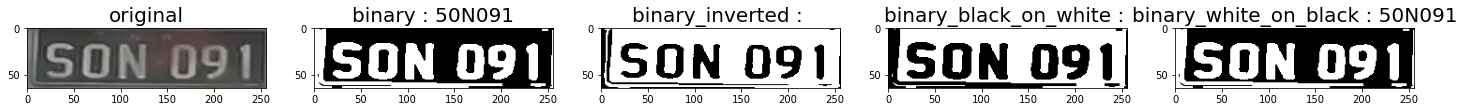

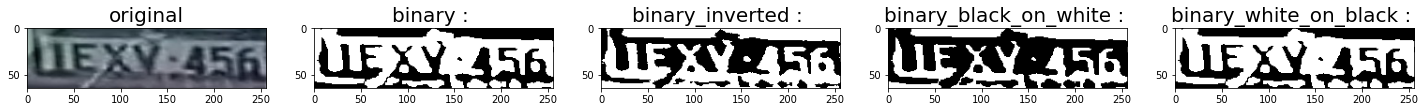

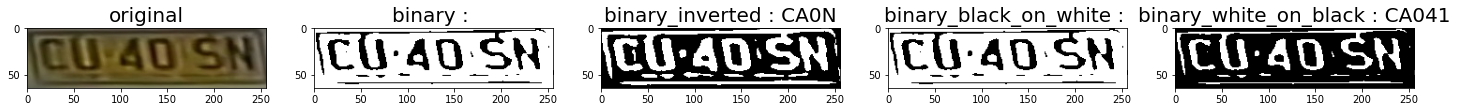

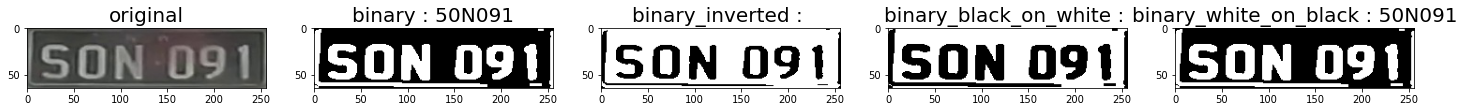

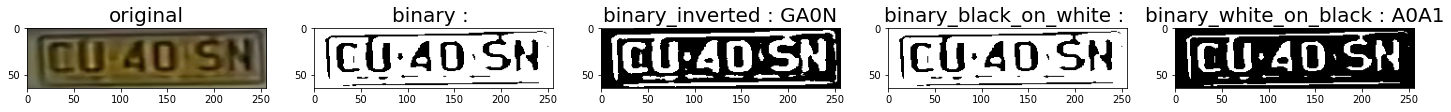

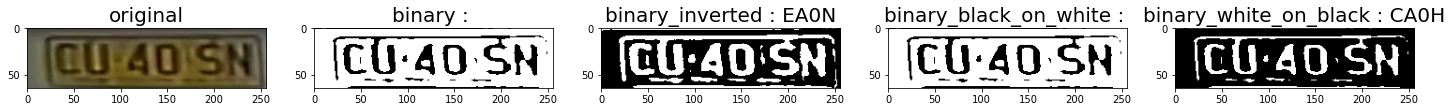

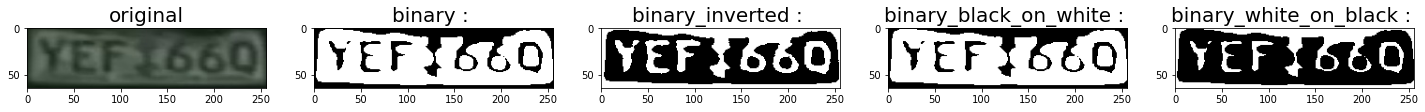

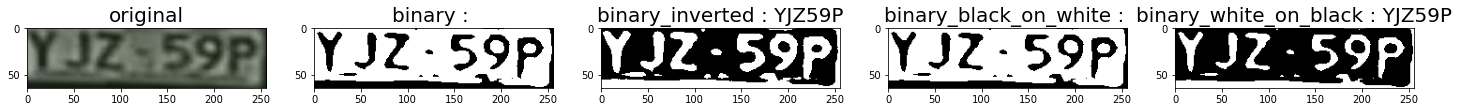

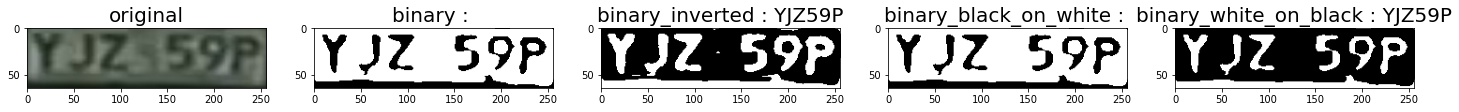

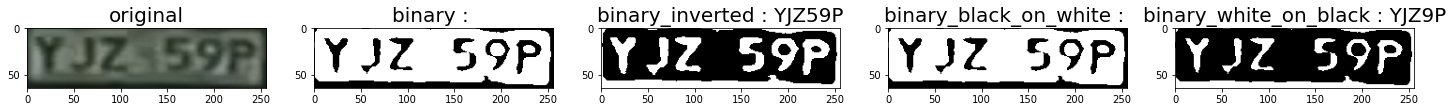

In [14]:
for img_path in fnames:
    test_image = plt.imread(img_path)
    test_all_formats(test_image)
    #print('********************************************************************************************')